<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220208_cv2_KNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN 개념

### 산점도에 나타난 새로운 데이터 분류

[1.] [34. 72.]
[0.] [52. 42.]
[1.] [26. 21.]
[0.] [88. 99.]
[1.] [86.  9.]
[0.] [52. 37.]
[1.] [18. 89.]
[1.] [42. 66.]
[0.] [82. 91.]
[0.] [58. 96.]
[0.] [32. 89.]
[0.] [68. 73.]
[1.] [51. 54.]
[1.] [68. 28.]
[0.] [24. 61.]
[0.] [90. 59.]
[0.] [61. 43.]
[0.] [ 7. 38.]
[0.] [22. 81.]
[1.] [1. 1.]
[1.] [22. 42.]
[1.] [53. 97.]
[0.] [76. 98.]
[1.] [ 2. 67.]
[0.] [45. 40.]
result: [[0.]]
neighbous [[0. 0. 1.]]
distance [[113. 221. 225.]]


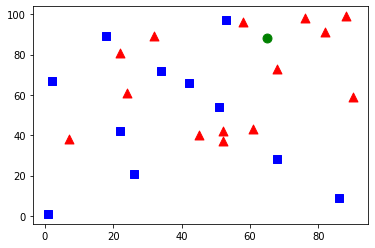

In [37]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow()는 코랩에서 작동 안함

# 0 ~ 100 사이 값을 갖는 25개의 훈련 데이터를 무작위로 생성

# 하니의 데이터당 (x,y) 좌표를 갖기 때문에 배열은 (25, 2) 크기를 갖습니다. 
train = np.random.randint(0, 100, (25, 2)).astype(np.float32)
# 25개의 데이터에 대해 0 또는 1로 라벨을 붙입니다. 
response = np.random.randint(0, 2, (25, 1)).astype(np.float32)

# 라벨, (x,y) 좌표를 출력합니다.
for i in range(0, 25):
    print(response[i], train[i])

# 0이라 이름 부여진 데이터를 뽑아서 red클래스로 가져옵니다.
red = train[response.ravel() == 0] # (25, 1)의 2차원 배열 reponse를 1차원 배열로 변경하고, 0이면 True인 인덱스를 가져와서 train에 적용
# 다차원의 배열을 1차원으로 변경하는 세가지 함수 : ravel(), reshape(), flatten()

# 1이라 이름 부여진 데이터를 뽑아서 blue클래스로 가져옵니다.
blue = train[response.ravel() == 1]

# scatter
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^') # scatter(x, y) : x,y를 리스트/배열 같은 iterable형태로 받음
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# KNN 알고리즘을 초기화합니다.
knn = cv2.ml.KNearest_create()

# 좌표와 라벨을 전달하여 모델을 훈련시킵니다.
knn.train(train, cv2.ml.ROW_SAMPLE, response)

# 새로 추가되는 데이터를 만들어서 화면에 표시합니다.
newdata = np.random.randint(0, 100, (1, 2)).astype(np.float32) # 0-99중 랜덤하게 (x, y) : (x, y)값은 (N=1, d=2) 크기임
plt.scatter(newdata[:, 0], newdata[:, 1], 80, 'g', 'o')

# k=3으로 해서 최근접 이웃들을 찾아서 새로 추가된 데이터가 어느쪽에 속하는 지 결정합니다.
ret, results, neighbous, distance = knn.findNearest(newdata, 3)

print("result:", results) # [[1.]] : (1, 1)배열, 1로 라벨링된 red가 있었음
print("neighbous", neighbous) # [[1. 1. 0.]] : (1, 3)배열, red, red, blue 순서로 가까이 있었음
print("distance", distance)# [[ 17.  29. 400.]] : (1, 3)배열, 각각의 거리만큼 떨어져 있었음

plt.show()

### 산점도에 나타난 새로운 5개 데이터 분류

[1.] [30. 41.]
[0.] [55.  1.]
[1.] [41. 34.]
[1.] [5. 4.]
[1.] [46. 78.]
[1.] [79. 10.]
[1.] [83. 40.]
[0.] [28. 30.]
[1.] [72. 90.]
[1.] [14. 31.]
[0.] [ 6. 24.]
[0.] [70. 40.]
[1.] [56. 38.]
[1.] [21. 79.]
[1.] [99. 48.]
[1.] [47. 31.]
[1.] [ 0. 36.]
[0.] [88. 59.]
[0.] [28. 47.]
[1.] [23.  3.]
[0.] [89. 68.]
[1.] [95. 34.]
[0.] [35. 38.]
[1.] [14. 61.]
[0.] [15. 47.]
result: [[1.]
 [1.]
 [0.]
 [1.]
 [0.]]
neighbous [[1. 0. 1.]
 [1. 1. 1.]
 [0. 1. 0.]
 [1. 1. 1.]
 [0. 0. 1.]]
distance [[  34.   82.  296.]
 [ 200.  754. 1105.]
 [  68.  180.  185.]
 [  61.   85.  109.]
 [  53.  157.  500.]]


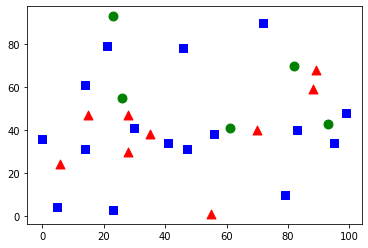

In [38]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow()는 코랩에서 작동 안함

# 0 ~ 100 사이 값을 갖는 25개의 훈련 데이터를 무작위로 생성

# 하니의 데이터당 (x,y) 좌표를 갖기 때문에 배열은 (25, 2) 크기를 갖습니다. 
train = np.random.randint(0, 100, (25, 2)).astype(np.float32)
# 25개의 데이터에 대해 0 또는 1로 라벨을 붙입니다. 
response = np.random.randint(0, 2, (25, 1)).astype(np.float32)

# 라벨, (x,y) 좌표를 출력합니다.
for i in range(0, 25):
    print(response[i], train[i])

# 0이라 이름 부여진 데이터를 뽑아서 red클래스로 가져옵니다.
red = train[response.ravel() == 0] # (25, 1)의 2차원 배열 reponse를 1차원 배열로 변경하고, 0이면 True인 인덱스를 가져와서 train에 적용
# 다차원의 배열을 1차원으로 변경하는 세가지 함수 : ravel(), reshape(), flatten()

# 1이라 이름 부여진 데이터를 뽑아서 blue클래스로 가져옵니다.
blue = train[response.ravel() == 1]

# scatter
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^') # scatter(x, y) : x,y를 리스트/배열 같은 iterable형태로 받음
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# KNN 알고리즘을 초기화합니다.
knn = cv2.ml.KNearest_create()

# 좌표와 라벨을 전달하여 모델을 훈련시킵니다.
knn.train(train, cv2.ml.ROW_SAMPLE, response)

# 새로 추가되는 데이터(5개)를 만들어서 화면에 표시합니다.
newdata = np.random.randint(0, 100, (5, 2)).astype(np.float32) # 0-99중 랜덤하게 (x, y) : (x, y)값은 (N=1, d=2) 크기임
plt.scatter(newdata[:, 0], newdata[:, 1], 80, 'g', 'o')

# k=3으로 해서 최근접 이웃들을 찾아서 새로 추가된 데이터가 어느쪽에 속하는 지 결정합니다.
ret, results, neighbous, distance = knn.findNearest(newdata, 3)

# 5개의 newdata추가시 결과 : (5, d)의 배열로 결과를 보여줌, 윗줄부터 순서대로 해석
print("result:", results) # (5, 1)배열, 순서대로 라벨링된 값(0 또는 1)을 반환
print("neighbous", neighbous) # (5, 3)배열, red, red, blue 순서로 가까이 있었음
print("distance", distance) # (5, 3)배열, 각각의 거리만큼 떨어져 있었음

plt.show()

# KNN 그림판으로 작성한 숫자 인식

In [97]:
from google.colab.patches import cv2_imshow # cv2.imshow()는 코랩에서 작동 안함
import cv2
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/digits.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)] # [[0, ..., 99], [2row], [3row], ..., [50row]]
# type(cells) : list, cv2_imshow() 불가

img = np.array(cells) # 리스트 -> 2차원 배열(array) : [[], [], [], ..., []]
# type(img) : array, (50, 100, 20, 20) shape 이기 때문에 cv2_imshow()하려면 img[0, 0] 등으로 (20, 20) 2차원 shape으로 바꿔줘야 가능

# cv2_imshow(img[0, 0]) # 0 이미지 1개 출력됨
# cv2_imshow(img[5, 0]) # 1 이미지 1개 출력됨
# cv2_imshow(img.reshape(-1, 20)[:20, :20]) # 0 1개 이미지 출력됨

train = img.reshape(-1, 400).astype(np.float32) # shape (N=5000, d=400), 숫자 하나를 하나의 행 X 5000개 글자 

# test해볼 문자(20, 20, 3) : 20x20 크기에 BGR
test_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/3.png', cv2.IMREAD_GRAYSCALE) # (20, 20)
test = test_img.reshape(-1, 400).astype(np.float32) # (1, 400)

k = np.arange(10)
train_labels = np.repeat(k,500)[:,np.newaxis] # np.newaxis 차원을 한단계 늘려줌
train_labels.shape # (5000, ) : 벡터인가 리스트인가 -> 1차원 배열
# 1D 배열(N, )/(, d)을 행 벡터(N, 1) 또는 열 벡터(1, d) np.newaxis 로 명시 적으로 변환

# test_labels = train_labels.copy() # test_labels는 불필요

# knn 초기화
knn = cv2.ml.KNearest_create()
# 학습
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
# 결과
ret, result, neighbors, dist = knn.findNearest(test, k=5)

print('입력한 숫자는 : {} '.format(result[0, 0].astype(int)))



입력한 숫자는 : 3 


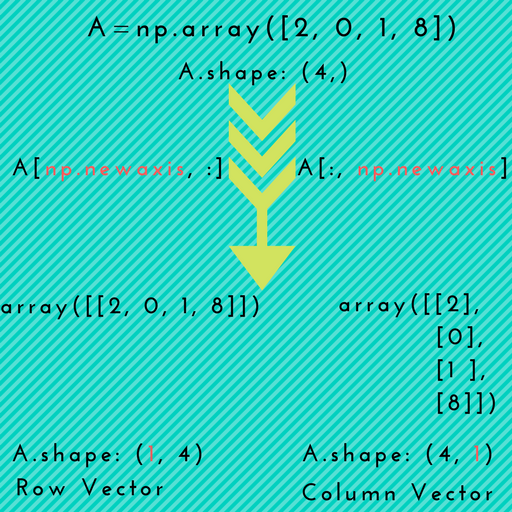

In [82]:
from google.colab.patches import cv2_imshow # cv2.imshow()는 코랩에서 작동 안함
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/array_vector.png')
# img_resize = img.resize((250, 250))

cv2_imshow(img)

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
